In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
%time training_data = pd.read_csv('GOOG.csv')


CPU times: total: 0 ns
Wall time: 18 ms


In [4]:
# Display the shape and basic statistics of the data
print(training_data.shape)
print(training_data.head())
print(training_data.describe())

(4858, 7)
         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512
              Open         High          Low        Close    Adj Close  \
count  4858.000000  4858.000000  4858.000000  4858.000000  4858.000000   
mean     41.477174    41.917059    41.055491    41.494404    41.494404   
std      38.590695    39.031758    38.193016    38.618107    38.618107   
min       2.470490     2.534002     2.390042     2.490913     2.490913   
25%      12.846597    12.954195    12.712414    12.834642    12.834642   
50%      26.499958    26.728268    26.289323    26.537501    26.537501   
75%      57.3672

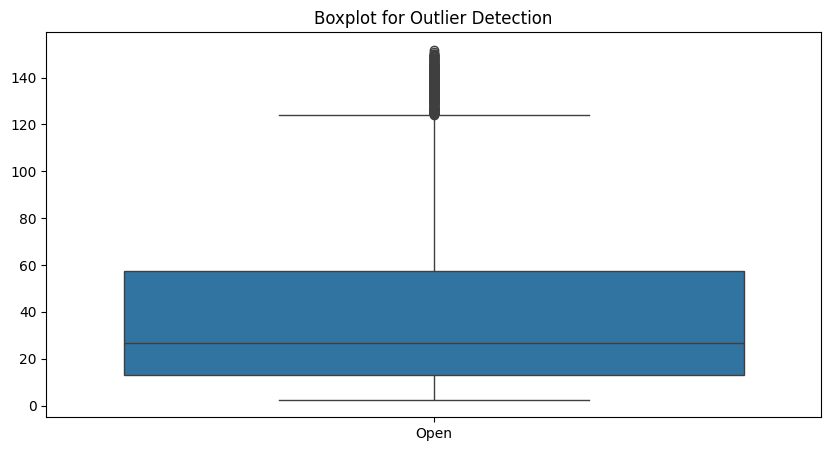

In [5]:
# Outlier detection using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=training_data.iloc[:, 1:2])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [6]:
# Outlier detection using Z-scores
z_scores = np.abs(stats.zscore(training_data.iloc[:, 1:2]))
outliers = np.where(z_scores > 3)
print("Outliers detected at indices:", outliers)

Outliers detected at indices: (array([], dtype=int64), array([], dtype=int64))


In [7]:

# Remove outliers
training_data_no_outliers = training_data[(z_scores < 3).all(axis=1)]

In [8]:
# Display the shape of the data without outliers
print(training_data_no_outliers.shape)
print(training_data_no_outliers.head())

(4858, 7)
         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512


In [9]:

# Preprocessing the data
training_data = training_data_no_outliers.iloc[:, 1:2]
print(training_data.shape)
print(training_data.head())

(4858, 1)
       Open
0  2.490664
1  2.515820
2  2.758411
3  2.770615
4  2.614201


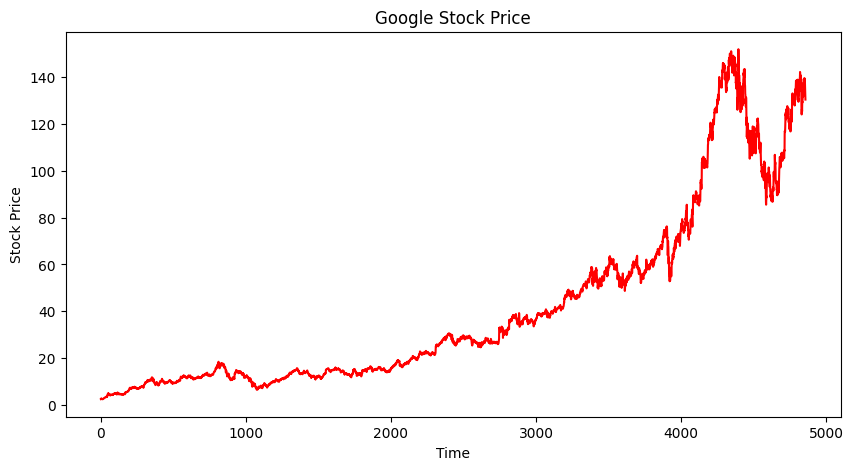

In [10]:

# Plot the training data
plt.figure(figsize=(10, 5))
plt.plot(training_data, color='red')
plt.ylabel('Stock Price')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.show()

In [11]:
# Scale the data
mm = MinMaxScaler(feature_range=(0, 1))
training_data_scaled = mm.fit_transform(training_data)

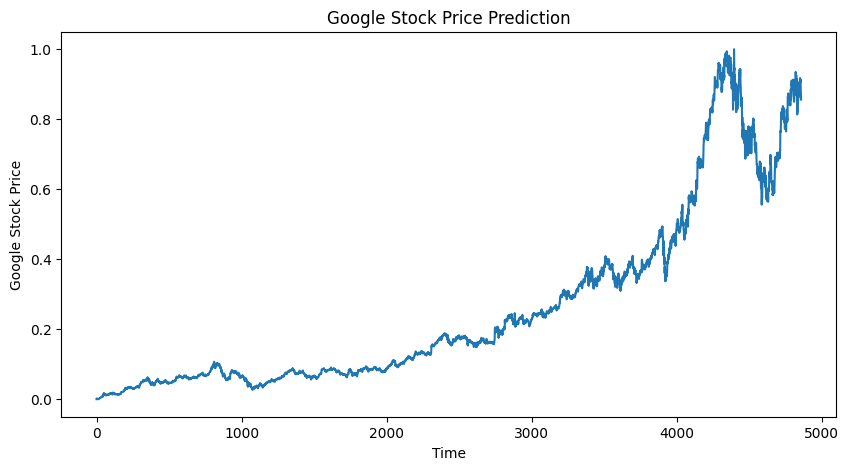

In [12]:

# Plot the scaled training data
plt.figure(figsize=(10, 5))
plt.plot(training_data_scaled)
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()

In [16]:
split_ratio = 0.7
train_size = int(len(training_data_scaled) * split_ratio)
test_size = len(training_data_scaled) - train_size
train_data = training_data_scaled[:train_size]
test_data = training_data_scaled[train_size:]

In [17]:

train_data = training_data_scaled[:train_size]
test_data = training_data_scaled[train_size:]

In [18]:
print(f'Training data size: {len(train_data)}')
print(f'Testing data size: {len(test_data)}')

Training data size: 3400
Testing data size: 1458


In [19]:
x_train = train_data[:-1]
y_train = train_data[1:]

In [20]:
# Prepare the training data
x_train = training_data_scaled[59:1257]
y_train = training_data_scaled[60:1258]
print(x_train.shape)
print(y_train.shape)

(1198, 1)
(1198, 1)


In [21]:
x_train = np.reshape(x_train, (1198, 1, 1))
print(x_train.shape)


(1198, 1, 1)


In [22]:
from keras.regularizers import l1, l2

In [23]:

# Build the LSTM model
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.1))
regressor.add(LSTM(units=50, return_sequences=True))

regressor.add(LSTM(units=50, return_sequences=True))

regressor.add(LSTM(units=50))

regressor.add(Dense(units=1))

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# Compile and fit the model
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0015
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0937e-04
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0482e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2164e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1735e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0478e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1348e-04
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9507e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7353e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1577e-05
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1010e-06
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6670e-06
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5915e-06
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3285e-06
Epoch 15/100
38/38 

In [26]:
# Test the model
test_data = pd.read_csv('GOOG.csv')
test_stock = test_data.iloc[:, 1:2]
print(len(test_stock))

4858


In [27]:

input_value = test_stock
input_value = mm.transform(input_value)
input_value = np.reshape(input_value, (input_value.shape[0], 1, 1))

prediction = regressor.predict(input_value)
prediction = mm.inverse_transform(prediction)

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(0, 0.5, 'Google Stock Price')

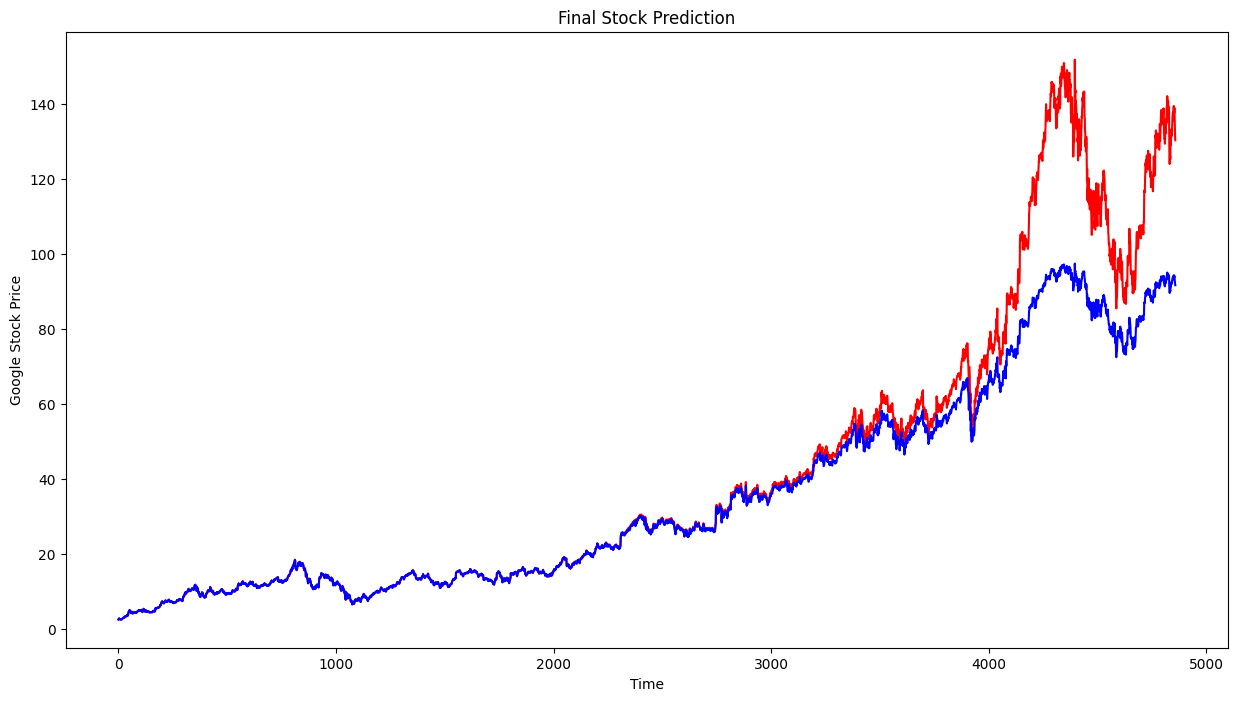

In [28]:

# Plot the results
plt.rcParams['figure.figsize'] = (15, 8)
plt.plot(test_stock, color='red', label='Real Stock')
plt.plot(prediction, color='blue', label='Predicted Stock')
plt.title('Final Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.4478e-05 - val_loss: 2.8121e-06
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7194e-06 - val_loss: 2.8018e-06
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7127e-06 - val_loss: 2.9762e-06
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0866e-06 - val_loss: 2.8929e-06
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5805e-06 - val_loss: 2.8985e-06
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1029e-06 - val_loss: 3.2469e-06
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2598e-06 - val_loss: 2.7554e-06
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1962e-06 - val_loss: 2.9214e-06
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2500e-06 - val_loss: 4.1160e-06
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6769e-06 - val_loss: 4.2907e-06


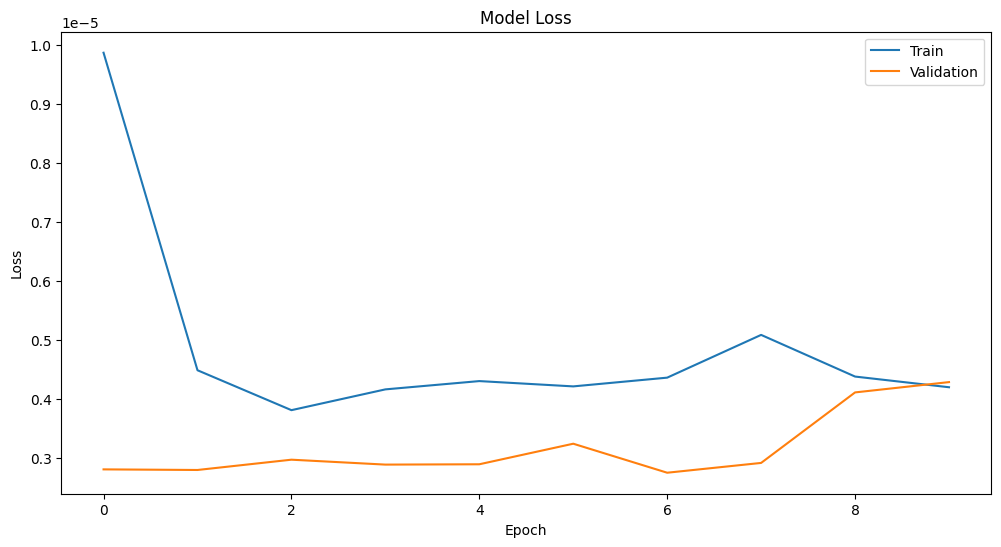

In [29]:
# Compile and fit the model
regressor.compile(optimizer='adam', loss='mean_squared_error')
history = regressor.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_train, y_train))

# Plotting the learning curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()